# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Необходимо ответить на вопросы:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

Описание данных

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

## Изучение общей информации о данных

In [1]:
# импорт необходимых библиотек и чтение файла данных
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [2]:
# вывод первых 20 строчек датафрейма 
data.head(20)
#data[data['total_income'].isnull()].count()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
# вывод основной информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Обработка пропусков

In [4]:
# вывод количества пропущенных значений для каждого столбца
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
# заполняем пропуски в income_type медианными значениями по каждому типу занятости
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

***
**В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**
***

### Обработка аномальных значений

In [6]:
data['days_employed'] = data['days_employed'].abs()

**В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
# выведем для каждого типа занятости медианное значение трудового стажа days_employed в днях
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставляем их как есть. Тем более этот столбец не понадобится для исследования.

In [8]:
# перечень уникальных значений столбца children.
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [9]:
# удаляем строки, в которых встречаются аномальные значения
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [10]:
# убеждаемся, что аномалии удалены
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Обработка пропусков (продолжение)

In [11]:
# заполняем пропуски в days_employed медианными значениями по каждому типу занятости
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [12]:
# проверяем, что пропусков больше нет
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Возможные причины появления пропусков в исходных данных.**

Можно выделить две основных причины: человеческий фактор и технологические ошибки.
Пропуски в колонках `days_employed` и `total_income`, вероятной причиной может быть человеческий фактор на стадии заполнении анкеты или сбой при выгрузке данных. 
Также, маловероятно, но правдоподоно человек действительно мог ни дня не работать или не иметь официального источника дохода. В каждом из 2174 раз `NaN`  встречается одновременно в столбцах `days_employed` и `total_income`, что говорит в пользу этой гипотезы. 
Равновероятно можно предположить, что столбец `total_income` рассчитывают по столбцу `days_employed`, так не заполнив последний, можно получить `NaN` в первом.

**Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

Медиана более устойчива к выбросам. Используя медиану мы получаем взвешенное значение по числу выборки, таким образом влияние на результат слишком высоких или низких редких значений будет незначительным, а значит оно лучше впишется в массив данных.

Наличие даже нескольких выдающихся высоких или низких значений значительно скажется на расчетном значении.

Таким образом, для расчета лучше подходит медиана.

### Изменение типов данных

In [13]:
# заменяемм вещественный тип данных в столбце total_income на целочисленный
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [14]:
# чтобы выявить все неявные дубликаты, приводми все значения к единому виду, к нижнему регистру
data['education'] = data['education'].str.lower()

In [15]:
# количество строк-дубликатов в данных
data.duplicated().sum()

71

In [16]:
# удаляем дубликаты
data = data.drop_duplicates()

### Категоризация данных

**На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`.**

In [17]:
# для этого напишем функцию categorize_income
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
# применяем функию и проверяем, что категоризация верна
data['total_income_category'] = data['total_income'].apply(categorize_income)
data[['total_income','total_income_category']].head()

,total_income,total_income_category
0,253875,B
1,112080,C
2,145885,C
3,267628,B
4,158616,C


In [19]:
# выведем на экран перечень уникальных целей взятия кредита из столбца purpose
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
# применяем функию и проверяем, что категоризация верна
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data['purpose_category'].value_counts()

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

***
**Вывод:** Перед исследованием мы обработали пропуски, аномальные значения, дубликаты. Привели типы данных к удобному формату и разбили данные на категории по критериям *доход* и *цель кредита*.

Можно выделить две основные причины пропусков данных: человеческий фактор и технологические ошибки. Пропуски решили обрабатывать удаляя строки целиком в `days_employed`, а `total_income` заполнять медианными значениями, т.к. медиана более устойчива к выбросам.
***

## Исследование данных и ответы на вопросы

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

,clients,debt_ratio
children,,
0,14091,7.54%
1,4808,9.23%
2,2052,9.45%
3,330,8.18%
4,41,9.76%
5,9,0.00%


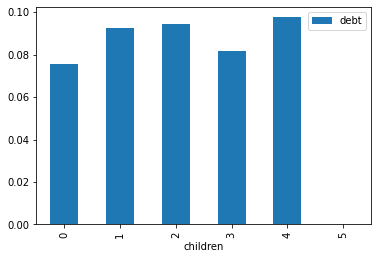

In [22]:
#для проверки связей используем сводную таблицу и график
children_pivot = data.pivot_table(index = ['children'], values = 'debt', aggfunc = (['count', lambda x:
                                                                                   '{:.2%}'.format(x.mean())]))

# index - 'children' столбец, по которому происходит группировка данных
# values - 'debt' значения, по которым мы хотим увидеть сводную таблицу
# aggfunc - 'count' и 'mean' применяем к значениям, lamda приводим к виду процентов

#избавляемся от подкатегорий и переименовываем столбцы
children_pivot.columns = ['_'.join(col).strip() for col in children_pivot.columns.values]
children_pivot = children_pivot.rename(columns={'count_debt': 'clients', '<lambda>_debt': 'debt_ratio'})


#отдельная сводная таблица для гистограммы
children_pivot_plot = data.pivot_table(index = ['children'], values = 'debt', aggfunc = 'mean')
children_pivot_plot.plot(kind='bar')
children_pivot

**Вывод:** Кредитополучатели без детей являются немного более ответственными, чем клиенты у которых есть дети.

У `бездетной` группы и группы с `3мя детьми` самый низкий процент невозврата кредита **7.54%** и **8.18%** соответсвенно, т.е. люди в этих группах чаще возвращают кредит в срок.
Нулевой результат по группе с `5тью детьми` непредставителен, т.к. включает в себя всего 9 значений, к тому же в соседней от него группе c `4мя  детьми` самый высокий показатель задолженности: **9.76%**. 
Проведя дополнительное исследование, объединив группы 4 и 5, веротяно, получим значения схожие с группами 1 и 2.



### Есть ли зависимость между семейным положением и возвратом кредита в срок?

,clients,debt_ratio
children,,
0,14091,7.54%
1,4808,9.23%
2,2052,9.45%
3,330,8.18%
4,41,9.76%
5,9,0.00%


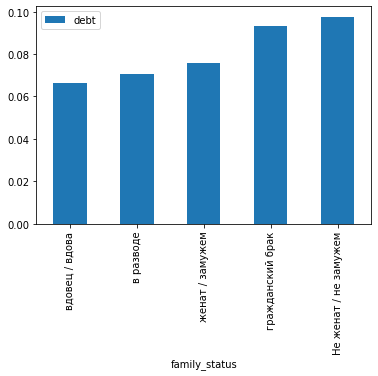

In [23]:
#для проверки связей используем сводную таблицу и график
family_status_pivot = data.pivot_table(index = ['family_status'], values = 'debt', aggfunc = (['count', lambda x:
                                                                                   '{:.2%}'.format(x.mean())]))
# index - 'family_status' столбец, по которому происходит группировка данных
# values - 'debt' значения, по которым мы хотим увидеть сводную таблицу
# aggfunc - 'count' и 'mean' применяем к значениям, lamda приводим к виду процентов

#избавляемся от подкатегорий и переименовываем столбцы
family_status_pivot.columns = ['_'.join(col).strip() for col in family_status_pivot.columns.values]
family_status_pivot = children_pivot.rename(columns={'count_debt': 'clients', '<lambda>_debt': 'debt_ratio'})

#отдельная сводная таблица для гистограммы
family_status_pivot_plot = data.pivot_table(index = ['family_status'], values = 'debt', aggfunc = 'mean')
family_status_pivot_plot = family_status_pivot_plot.sort_values('debt', ascending=True)
family_status_pivot_plot.plot(kind='bar')
family_status_pivot

**Вывод:** Клиенты, которые не состоят в браке являются менее ответственными, что создает риски для банка.

Чаще всего за кредитами обращаются `замужние клиенты` – более половины из всей выборки. Чаще всего задолжность образуется у `не женатых` – в **9.76%** случаях. Так же стоит отметить близость показателя группы из `граждансково брака` к показателям группы должников-рекордсменов – **9.31%** Напротив, `вдовцы и вдовы` стремятся гасить кредит в срок – **6.62%**.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,clients,debt_ratio
total_income_category,,
D,349,6.02%
B,5014,7.06%
A,25,8.00%
C,15921,8.50%
E,22,9.09%


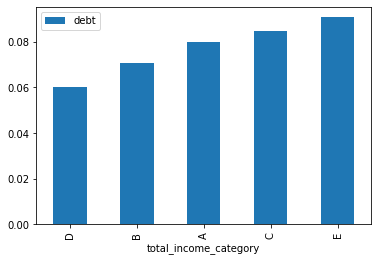

In [24]:
#для проверки связей используем сводную таблицу и график
income_pivot = data.pivot_table(index = ['total_income_category'], values = 'debt', aggfunc = (['count', lambda x:
                                                                                   '{:.2%}'.format(x.mean())]))
# index - 'family_status' столбец, по которому происходит группировка данных
# values - 'debt' значения, по которым мы хотим увидеть сводную таблицу
# aggfunc - 'count' и 'mean' применяем к значениям, lamda приводим к виду процентов

#избавляемся от подкатегорий и переименовываем столбцы
income_pivot.columns = ['_'.join(col).strip() for col in income_pivot.columns.values]
income_pivot = income_pivot.rename(columns={'count_debt': 'clients',
                                            '<lambda>_debt': 'debt_ratio'}).sort_values('debt_ratio', ascending=True)


#отдельная сводная таблица для гистограммы
income_pivot_plot = data.pivot_table(index = ['total_income_category'], values = 'debt', aggfunc = 'mean')
income_pivot_plot = income_pivot_plot.sort_values('debt', ascending=True)
income_pivot_plot.plot(kind='bar')
income_pivot

**Вывод:** Три чевтерти от всей выборки сосредоточены в группе* `C`, четверть в `В`, соотвественно достоверно судить о наличии или отсуствии зависимости мы можем судить в рамках двух этих групп, и с осторожностью `D`.

Кредитополучатели из категории оказались самыми ответсвенными `D`: **6.02%**, а большинство проявляют умеренную ответсьвенность: в категориях `В` и `C` показатель от **7.06%%** до **8.50%%**.

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

### Как разные цели кредита влияют на его возврат в срок?

,clients,debt_ratio
purpose_category,,
операции с недвижимостью,10751,7.26%
проведение свадьбы,2313,7.91%
получение образования,3988,9.25%
операции с автомобилем,4279,9.35%


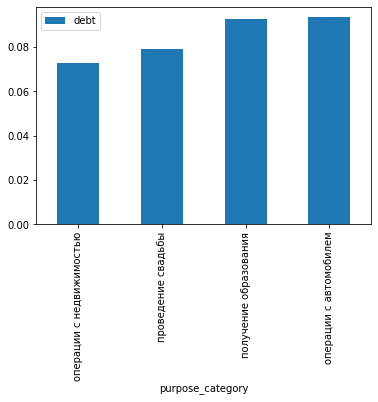

In [25]:
#для проверки связей используем сводную таблицу и график
purpose_pivot = data.pivot_table(index = ['purpose_category'], values = 'debt', aggfunc = (['count', lambda x:
                                                                                   '{:.2%}'.format(x.mean())]))
# index - 'family_status' столбец, по которому происходит группировка данных
# values - 'debt' значения, по которым мы хотим увидеть сводную таблицу
# aggfunc - 'count' и 'mean' применяем к значениям, lamda приводим к виду процентов

#избавляемся от подкатегорий и переименовываем столбцы
purpose_pivot.columns = ['_'.join(col).strip() for col in purpose_pivot.columns.values]
purpose_pivot = purpose_pivot.rename(columns={'count_debt': 'clients',
                                            '<lambda>_debt': 'debt_ratio'}).sort_values('debt_ratio', ascending=True)

#отдельная сводная таблица для гистограммы
purpose_pivot_plot = data.pivot_table(index = ['purpose_category'], values = 'debt', aggfunc = 'mean')
purpose_pivot_plot = purpose_pivot_plot.sort_values('debt', ascending=True)
purpose_pivot_plot.plot(kind='bar')
purpose_pivot

**Вывод:** Клиенты, бравшие кредит на автомобиль и образование, чаще допускают просрочку, в отличие от тех, кто получил кредит на недвижимость и проведение свадьбы.

Как и в предыдущих исследованиях, здесь наблюдается перекос накопленных данных, в данном случае в группе `операции с недвижимостью`, что и не удивительно, недвижимость наиболее дорогостоящий и одноворменно желанный объект. В данном случае, перевес в одной группе не помешает сравнительному анализу.
Чаще всего платят в срок люди из группы `операции с недвижимостью`: **7.26%**.
Чаще всего просрачивают платежи люди из категории `операции с автомобилем`: **9.35%**.
Стоит отметить сходство показателей в гуппах `операции с недвижимостью` и `проведение свадьбы` **7.26%** и **7.91%** соответсвтенно и группах `получение образования` и `операции с автомобилем` **9.25%** и **9.35%**. Здесь так же интересен резкий "разрыв" между группами `проведение свадьбы` и `получение образования`.

## Общий вывод.

В результате анализа, клиентов можно описать следующим образом.

Наиболее кредитоспособные клиенты:
* `Без детей` или с `3мя детьми`: **7.54%** и **8.18%** соотвественно.
* `Вдовцы и вдовы`: **6.62%**.
* С доходом `30000–50000р` одни из самых ответственных: **6.02%**

Наименее кредитоспособные клиенты:
* С `4мя  детьми`: **9.76%** (один из самых высоких показателей)
* `Не женаты` или состоят в `гражданском браке`: **9.76%** и **9.31%**. 
* С доходами `200000–1000000р` и `50000–200000р`: **7.06%%** и **8.50%**. 

Так же стоит отметить, что среди клиентов:
* **66%** без детей
* **более половины** `замужем или женаты` 
* У **75%** доход `50000-200000р`, у **99%** доход `50000-1000000р`